# Implementation of MCP Neuron for AND and OR Function.

In [41]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2), "Input arrays must be of the same length."

  state_neuron = []  # List to store neuron outputs

  for x1, x2 in zip(X1, X2):
        sum_inputs = x1 + x2  # Perform element-wise addition
        if sum_inputs >= T:
            state_neuron.append(1)  # Activate neuron
        else:
            state_neuron.append(0)  # Do not activate neuron

  return state_neuron

In [42]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [43]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []  # List to store neuron outputs

    for x1, x2 in zip(X1, X2):
        sum_inputs = x1 + x2  # Perform element-wise addition
        if sum_inputs >= T:
            state_neuron.append(1)  # Activate neuron (1)
        else:
            state_neuron.append(0)  # Do not activate neuron (0)

    return state_neuron


In [44]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AIML/mnist_0_and_1.csv" )  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

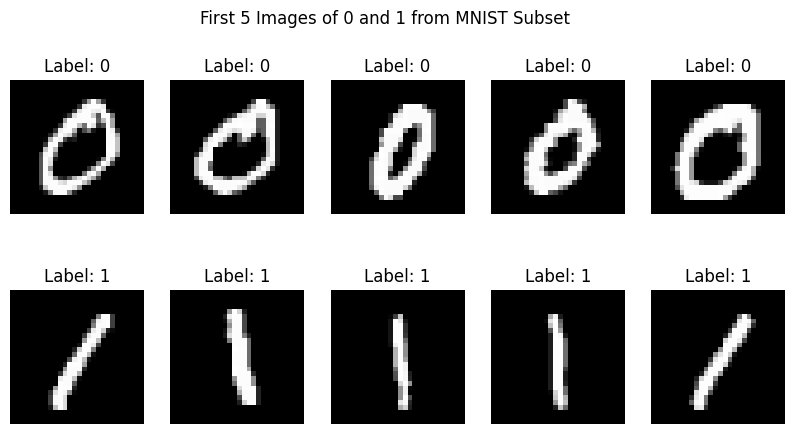

In [4]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [5]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [7]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [11]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    n_samples = X.shape[0]  # Number of samples

    for epoch in range(epochs):
        correct_predictions = 0  # Track the number of correct classifications

        for i in range(n_samples):
            # Compute the weighted sum (linear combination)
            prediction = np.dot(X[i], weights) + bias
            # Apply step function activation
            y_pred = 1 if prediction >= 0 else 0

            # Perceptron weight update rule
            if y_pred != y[i]:  # If misclassified
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]  # Adjust weights
                bias += update  # Adjust bias
            else:
                correct_predictions += 1  # Correct classification

        # Compute accuracy for the current epoch
        accuracy = (correct_predictions / n_samples) * 100
        print(f"Epoch {epoch + 1}: Accuracy = {accuracy:.2f}%")


    return weights, bias, accuracy

## Training the Perceptron

In [12]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1: Accuracy = 99.67%
Epoch 2: Accuracy = 99.82%
Epoch 3: Accuracy = 99.87%
Epoch 4: Accuracy = 99.87%
Epoch 5: Accuracy = 99.90%
Epoch 6: Accuracy = 99.93%
Epoch 7: Accuracy = 99.98%
Epoch 8: Accuracy = 99.95%
Epoch 9: Accuracy = 99.89%
Epoch 10: Accuracy = 99.92%
Epoch 11: Accuracy = 99.95%
Epoch 12: Accuracy = 99.98%
Epoch 13: Accuracy = 100.00%
Epoch 14: Accuracy = 100.00%
Epoch 15: Accuracy = 100.00%
Epoch 16: Accuracy = 100.00%
Epoch 17: Accuracy = 100.00%
Epoch 18: Accuracy = 100.00%
Epoch 19: Accuracy = 100.00%
Epoch 20: Accuracy = 100.00%
Epoch 21: Accuracy = 100.00%
Epoch 22: Accuracy = 100.00%
Epoch 23: Accuracy = 100.00%
Epoch 24: Accuracy = 100.00%
Epoch 25: Accuracy = 100.00%
Epoch 26: Accuracy = 100.00%
Epoch 27: Accuracy = 100.00%
Epoch 28: Accuracy = 100.00%
Epoch 29: Accuracy = 100.00%
Epoch 30: Accuracy = 100.00%
Epoch 31: Accuracy = 100.00%
Epoch 32: Accuracy = 100.00%
Epoch 33: Accuracy = 100.00%
Epoch 34: Accuracy = 100.00%
Epoch 35: Accuracy = 100.00%
Epoch 

## Step 5: Visualize Misclassified Images

In [13]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


# For 3 and 5


In [27]:
import pandas as pd
import matplotlib.pyplot as plt


df_3_5 = pd.read_csv("/content/drive/MyDrive/AIML/mnist_3_and_5.csv")

X = df_3_5.drop(columns=["label"]).values
y = df_3_5["label"].values

print("Feature Matrix Shape:", X.shape)
print("Label Vector Shape:", y.shape)

Feature Matrix Shape: (2741, 784)
Label Vector Shape: (2741,)


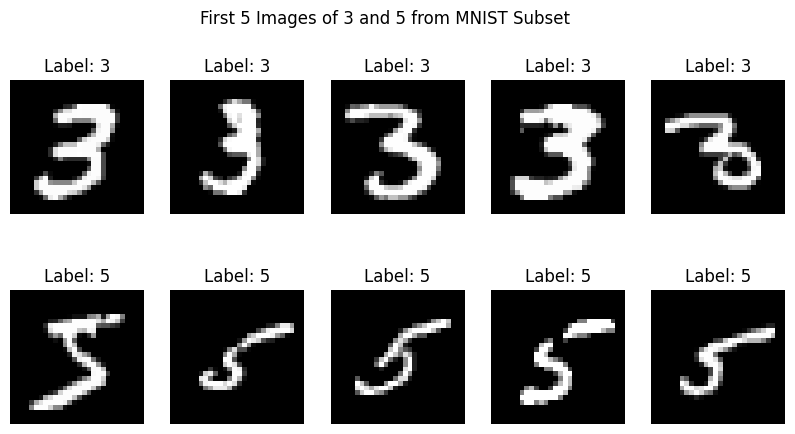

In [30]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if we have at least 5 images for each label
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")

        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [33]:
# Step 2: Initialize Perceptron Weights
weights = np.zeros(X.shape[1])  # 784 weights (one per pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [35]:
def decision_function(X, weights, bias):
    """
    Compute predicted labels using the perceptron decision function.
    """
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)

In [36]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train perceptron model using the perceptron learning rule.
    """
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0

            if y_pred != y[i]:  # Update weights and bias only if incorrect
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]
                bias += update
            else:
                correct_predictions += 1

        accuracy = (correct_predictions / n_samples) * 100
        print(f"Epoch {epoch + 1}: Accuracy = {accuracy:.2f}%")

    return weights, bias, accuracy

# Step 5: Train the Model
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

print("Final Training Accuracy:", accuracy)

# Step 6: Evaluate Model
y_pred = decision_function(X, weights, bias)
final_accuracy = np.mean(y_pred == y) * 100
print(f"Final Accuracy: {final_accuracy:.2f}%")

Epoch 1: Accuracy = 0.00%
Epoch 2: Accuracy = 0.00%
Epoch 3: Accuracy = 0.00%
Epoch 4: Accuracy = 0.00%
Epoch 5: Accuracy = 0.00%
Epoch 6: Accuracy = 0.00%
Epoch 7: Accuracy = 0.00%
Epoch 8: Accuracy = 0.00%
Epoch 9: Accuracy = 0.00%
Epoch 10: Accuracy = 0.00%
Epoch 11: Accuracy = 0.00%
Epoch 12: Accuracy = 0.00%
Epoch 13: Accuracy = 0.00%
Epoch 14: Accuracy = 0.00%
Epoch 15: Accuracy = 0.00%
Epoch 16: Accuracy = 0.00%
Epoch 17: Accuracy = 0.00%
Epoch 18: Accuracy = 0.00%
Epoch 19: Accuracy = 0.00%
Epoch 20: Accuracy = 0.00%
Epoch 21: Accuracy = 0.00%
Epoch 22: Accuracy = 0.00%
Epoch 23: Accuracy = 0.00%
Epoch 24: Accuracy = 0.00%
Epoch 25: Accuracy = 0.00%
Epoch 26: Accuracy = 0.00%
Epoch 27: Accuracy = 0.00%
Epoch 28: Accuracy = 0.00%
Epoch 29: Accuracy = 0.00%
Epoch 30: Accuracy = 0.00%
Epoch 31: Accuracy = 0.00%
Epoch 32: Accuracy = 0.00%
Epoch 33: Accuracy = 0.00%
Epoch 34: Accuracy = 0.00%
Epoch 35: Accuracy = 0.00%
Epoch 36: Accuracy = 0.00%
Epoch 37: Accuracy = 0.00%
Epoch 38: 

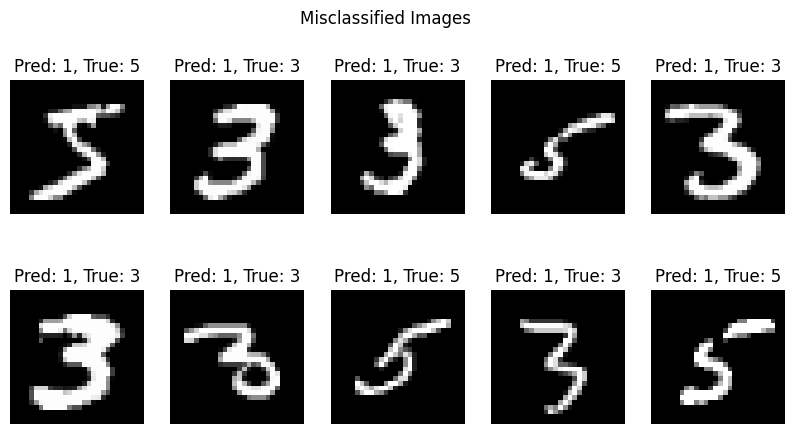

In [37]:
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")
